In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.loadtxt('data-pca.txt', delimiter=',')

x = data[:,0]
y = data[:,1]

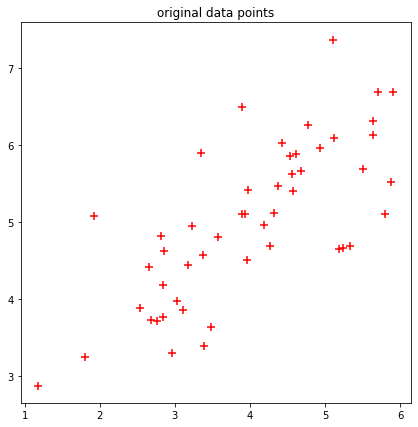

In [8]:
plt.figure(figsize=(7,7))
plt.title('original data points')
plt.scatter(x,y, c='red', s=70, marker='+')

In [18]:
def normalize_data(x, y):

    nomalized_x = (x - np.mean(x)) / np.std(x)
    nomalized_y= (y - np.mean(y)) / np.std(y)

    return nomalized_x, nomalized_y
nomalized_x, nomalized_y = normalize_data(x,y)

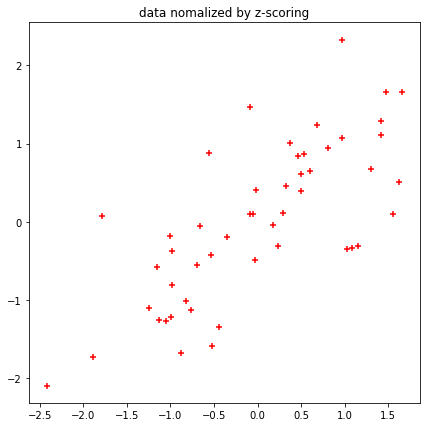

In [19]:
plt.figure(figsize=(7,7))
plt.title('data nomalized by z-scoring')
plt.scatter(nomalized_x,nomalized_y, c='red', marker='+')

In [78]:
def compute_covariance(x, y):
    n = x.shape[0]
    z = np.concatenate([x[:, None],y[:, None]],axis=1)
    covar = z.T.dot(z)/n   
    return covar
covar = compute_covariance(nomalized_x, nomalized_y)
covar

array([[1.     , 0.73553],
       [0.73553, 1.     ]])

In [148]:
def compute_principal_direction(covariance):

    eig_val, eig_vec = np.linalg.eig(covar)
    direction = eig_vec * eig_val
    return direction

direction = compute_principal_direction(covar)
direction

[1.73553 0.26447]


array([[ 1.22720503, -0.18700853],
       [ 1.22720503,  0.18700853]])

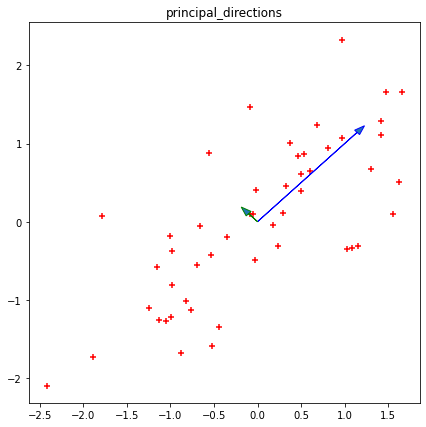

In [143]:
plt.figure(figsize=(7,7))
plt.title('principal_directions')
plt.scatter(nomalized_x,nomalized_y, c='red', marker='+')
# 벡터의 크기가 더 큰 게 첫번째?
direction1 = direction[:,0]
direction2 = direction[:,1]
plt.arrow(0,0,direction1[0], direction1[1], length_includes_head=True, head_width=0.08,ec ='blue')
plt.arrow(0,0,direction2[0], direction2[1], length_includes_head=True, head_width=0.08,ec ='green')

In [145]:
def compute_projection(point, axis):

    projection = np.dot(point, axis) / np.dot(axis, axis) * axis
    
    return projection

In [147]:
def compute_distance(point1, point2):

    distance = np.power(np.sum(np.power(point1 - point2,2),axis=1),0.5)

    return distance

In [155]:
z = np.concatenate([x[:, None],y[:, None]],axis=1)
proj_z = []
for point in z :
    proj_z.append(compute_projection(point, direction1))
proj_z = np.array(proj_z)

In [157]:
proj_z

array([[3.385335, 3.385335],
       [5.19103 , 5.19103 ],
       [3.533835, 3.533835],
       [3.24032 , 3.24032 ],
       [3.511035, 3.511035],
       [5.189525, 5.189525],
       [3.55433 , 3.55433 ],
       [6.296035, 6.296035],
       [4.51367 , 4.51367 ],
       [5.09257 , 5.09257 ],
       [4.98586 , 4.98586 ],
       [4.91645 , 4.91645 ],
       [4.57319 , 4.57319 ],
       [4.95279 , 4.95279 ],
       [3.30193 , 3.30193 ],
       [5.97369 , 5.97369 ],
       [5.175785, 5.175785],
       [3.738485, 3.738485],
       [6.23668 , 6.23668 ],
       [4.914535, 4.914535],
       [6.194185, 6.194185],
       [4.19123 , 4.19123 ],
       [5.87991 , 5.87991 ],
       [4.47645 , 4.47645 ],
       [3.210505, 3.210505],
       [4.083195, 4.083195],
       [5.442255, 5.442255],
       [5.450675, 5.450675],
       [3.817905, 3.817905],
       [4.494595, 4.494595],
       [4.61812 , 4.61812 ],
       [5.700575, 5.700575],
       [3.48051 , 3.48051 ],
       [5.006125, 5.006125],
       [3.9704

In [160]:
line = [[nomalized_x.min()-0.5,nomalized_x.max()+0.5],[nomalized_y.min()-0.5,nomalized_y.max()+0.5]]

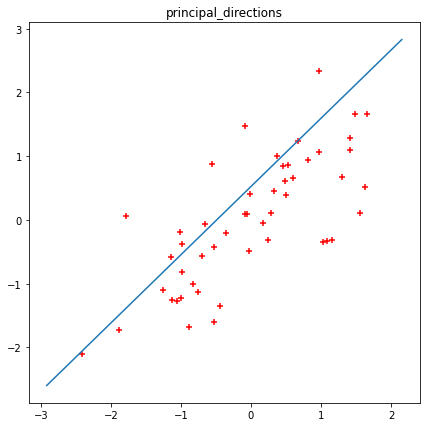

In [161]:
plt.figure(figsize=(7,7))
plt.title('principal_directions')
plt.scatter(nomalized_x,nomalized_y, c='red', marker='+')
plt.plot(line[0],line[1])